In [1]:
import pickle
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, StratifiedKFold
from sklearn.decomposition import PCA

from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, RocCurveDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

### Loading the best models

In [2]:
with open('../Best model pickle files/logistic_reg_best.pkl', 'rb') as f1:
    lr_best = pickle.load(f1)

with open('../Best model pickle files/svm_best.pkl', 'rb') as f2:
    svm_best = pickle.load(f2)

with open('../Best model pickle files/decision_tree_best.pkl', 'rb') as f3:
    tree_best = pickle.load(f3)

with open('../Best model pickle files/random_forest_best.pkl', 'rb') as f4:
    rf_best = pickle.load(f4)

### Reading the dataset (KNN Imputed Outlier Handled)

In [3]:
df = pd.read_csv("../processed-datasets/data_outliers_handled_knn_imputed.csv")

In [4]:
df.head()

,Unnamed: 0,age_ma,Feature,Ti,La,Ce,Pr,Nd,Sm,Eu,...,Dy,Ho,Er,Tm,Yb,Lu,Y,Hf,U,Th
0,0,222.0,0.0,7.88,0.050,10.500,0.050,4.25000,11.60000,1.99000,...,259.21625,106.1375,437.54375,97.8675,936.725,172.63875,2737.00000,12390.0,305.0,134.0
1,1,222.0,0.0,10.90,1.555,61.505,0.725,7.74125,12.56125,2.64375,...,259.21625,106.1375,437.54375,97.8675,936.725,172.63875,2804.03875,12591.0,503.0,272.0
2,2,222.0,0.0,6.00,0.020,25.100,0.300,4.41000,12.56125,2.30000,...,259.21625,106.1375,437.54375,97.8675,936.725,172.63875,2804.03875,12724.0,639.0,414.0
3,3,222.0,0.0,9.06,0.280,12.000,0.070,1.88000,5.08000,1.01000,...,194.00000,83.0000,356.00000,89.5000,762.000,144.00000,1832.00000,12894.0,308.0,127.0
4,4,222.0,0.0,4.93,0.070,16.500,0.150,2.32000,8.23000,1.52000,...,257.00000,106.1375,437.54375,97.8675,936.000,171.00000,2355.00000,12535.0,348.0,155.0


In [5]:
df.drop(columns=['Unnamed: 0'], axis=1, inplace=True)

In [6]:
df.shape

(2988, 21)

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.shape

(2987, 21)

In [9]:
df.columns

Index(['age_ma', 'Feature', 'Ti', 'La', 'Ce', 'Pr', 'Nd', 'Sm', 'Eu', 'Gd',
       'Tb', 'Dy', 'Ho', 'Er', 'Tm', 'Yb', 'Lu', 'Y', 'Hf', 'U', 'Th'],
      dtype='object')

In [10]:
X = df.drop('Feature', axis=1).values
y = df.Feature.values

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2)

### Perform Scaling

In [12]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Fitting the models

In [13]:
lr_best.fit(X_train_scaled, y_train)

LogisticRegression(C=1, class_weight='balanced', max_iter=500, n_jobs=-1,
                   penalty='l1', solver='liblinear')

In [14]:
lr_pred = lr_best.predict(X_test_scaled)
# lr_pred_proba = lr_best.predict_proba(X_test_scaled)

In [15]:
def performance(y_test, y_pred):
    print("Accuracy of the model: ", round(accuracy_score(y_test, y_pred), 3))
    
    print("\n\n Classification Report: \n", classification_report(y_test, y_pred))
    
    cm = confusion_matrix(y_test, y_pred)
    
    ConfusionMatrixDisplay(cm, display_labels=['Barren', 'Fertile']).plot(cmap='OrRd')

Accuracy of the model:  0.881


 Classification Report: 
               precision    recall  f1-score   support

         0.0       0.94      0.84      0.89       338
         1.0       0.82      0.93      0.87       260

    accuracy                           0.88       598
   macro avg       0.88      0.89      0.88       598
weighted avg       0.89      0.88      0.88       598



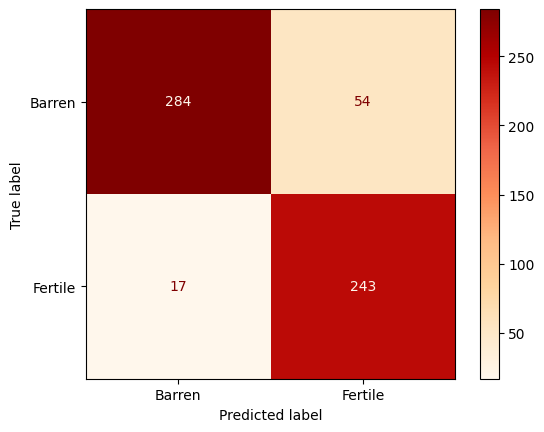

In [16]:
performance(y_test, lr_pred)

### SVM

In [17]:
svm_best.fit(X_train_scaled, y_train)

SVC(C=4)

In [18]:
svm_pred = svm_best.predict(X_test_scaled)
# svm_pred_proba = svm_best.predict_proba(X_test_scaled)

Accuracy of the model:  0.945


 Classification Report: 
               precision    recall  f1-score   support

         0.0       0.98      0.92      0.95       338
         1.0       0.90      0.98      0.94       260

    accuracy                           0.94       598
   macro avg       0.94      0.95      0.94       598
weighted avg       0.95      0.94      0.95       598



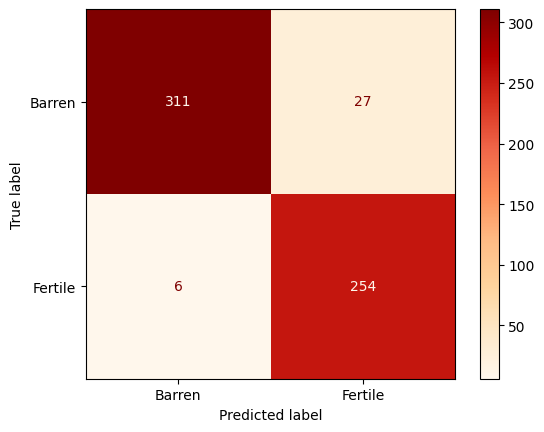

In [19]:
performance(y_test, svm_pred)

### Decision Trees

In [20]:
tree_best.fit(X_train_scaled, y_train)

DecisionTreeClassifier(criterion='log_loss', max_depth=10, max_features='log2')

In [21]:
tree_pred = tree_best.predict(X_test_scaled)
# tree_pred_proba = tree_best.predict_proba(X_test_scaled)

Accuracy of the model:  0.915


 Classification Report: 
               precision    recall  f1-score   support

         0.0       0.95      0.89      0.92       338
         1.0       0.87      0.94      0.91       260

    accuracy                           0.91       598
   macro avg       0.91      0.92      0.91       598
weighted avg       0.92      0.91      0.92       598



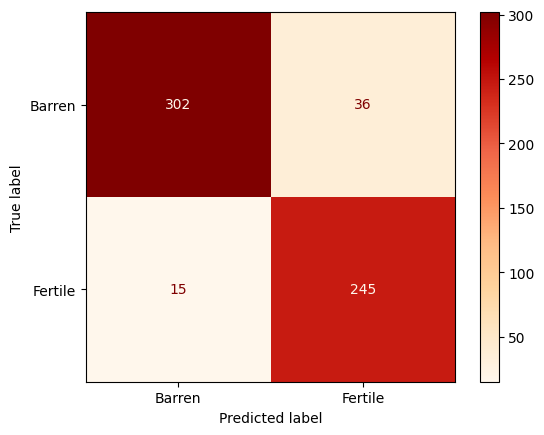

In [22]:
performance(y_test, tree_pred)

### Random Forest

In [23]:
rf_best.fit(X_train_scaled, y_train)

RandomForestClassifier(criterion='entropy', max_depth=11, max_features='log2',
                       n_estimators=500)

In [24]:
rf_pred = rf_best.predict(X_test_scaled)
# rf_pred_proba = rf_best.predict_proba(X_test_scaled)

Accuracy of the model:  0.965


 Classification Report: 
               precision    recall  f1-score   support

         0.0       0.97      0.97      0.97       338
         1.0       0.96      0.96      0.96       260

    accuracy                           0.96       598
   macro avg       0.96      0.96      0.96       598
weighted avg       0.96      0.96      0.96       598



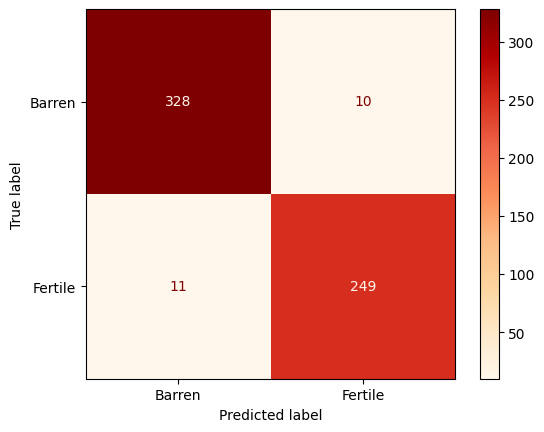

In [25]:
performance(y_test, rf_pred)

### Decision Boundary Plotter

In [26]:
def plot_decision_surface(X_test_scaled, y_test, model, title):
    
    input_features = X_test_scaled.copy()
    output_feature = y_test.copy()
    
    pca = PCA(n_components = 2)

    X_reduced = pca.fit_transform(input_features)
    
    def make_meshgrid(x, y, h=.02):
        x_min, x_max = x.min() - 1, x.max() + 1
        y_min, y_max = y.min() - 1, y.max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
        return xx, yy
    
    def plot_contours(ax, clf, xx, yy, **params):
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        out = ax.contourf(xx, yy, Z, **params)
        return out
    
    plot_model = model
    plot_model.fit(X_reduced, output_feature)
    
    fig, ax = plt.subplots(facecolor='white')

    # Set-up grid for plotting.
    X0, X1 = X_reduced[:, 0], X_reduced[:, 1]
    xx, yy = make_meshgrid(X0, X1)

    plot_contours(ax, plot_model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.3)
    ax.scatter(X0, X1, c=y_test, edgecolors='k', cmap=plt.cm.coolwarm, s=20)
    ax.set_ylabel('Principal Component 2')
    ax.set_xlabel('Principal Component 1')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(f'{title} - Decison surface')
    ax.legend(labels=['Barren', 'Fertile'], fontsize="x-small")
    plt.show()

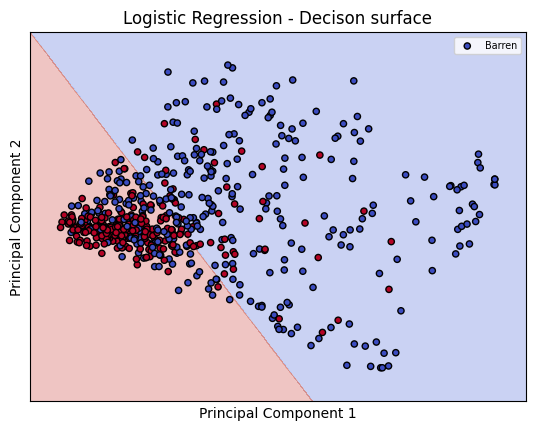

In [27]:
plot_decision_surface(X_test_scaled, y_test, lr_best, 'Logistic Regression')

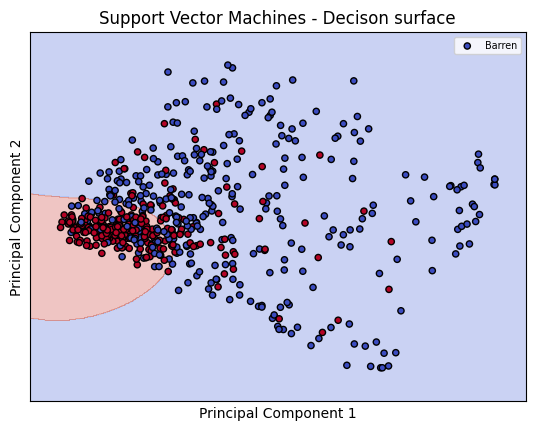

In [28]:
plot_decision_surface(X_test_scaled, y_test, svm_best, 'Support Vector Machines')

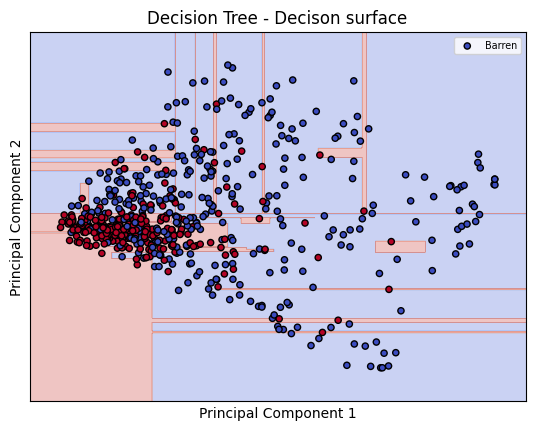

In [29]:
plot_decision_surface(X_test_scaled, y_test, tree_best, 'Decision Tree')

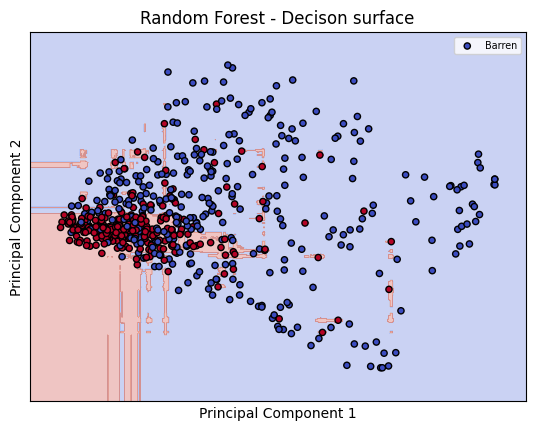

In [30]:
plot_decision_surface(X_test_scaled, y_test, rf_best, 'Random Forest')